___________________________________________________________________________
# **Machine Learning Project - Prediction of wine quality using ML algorithms.**

___________________________________________________________________________

**STEPS:**

**(1) Importing Packages**

**(2) Loading Dataset**

**(3) Plotting Graphs**

**(4) Pre-Processing Data**

**(5) K-Fold Implementation**

**(6) Creating ML models** 

    i) Logistic Regression
    ii) Single Perceptron
    iii) Multi Layer Perceptron 



**IMPORTING REQUIRED PAKAGES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

**LOADING DATASET**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/winequality-red.csv")
# df_white=pd.read_csv("/content/drive/MyDrive/winequality-white.csv",sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.shape

(1599, 12)

**PLOTTING GRAPHS FOR BETTER INSIGHTS TO DATA DISTRIBUTION**

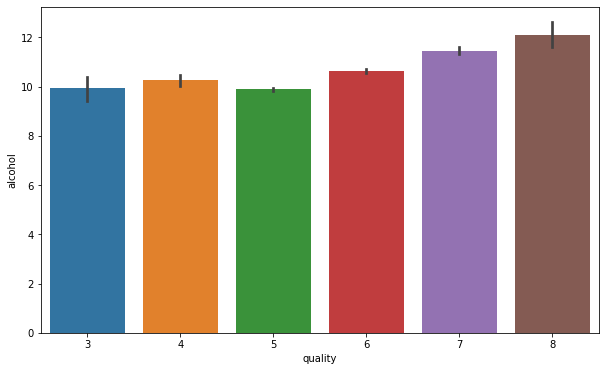

In [ ]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

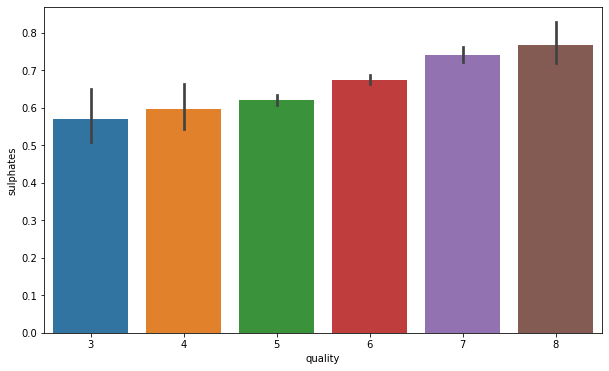

In [ ]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

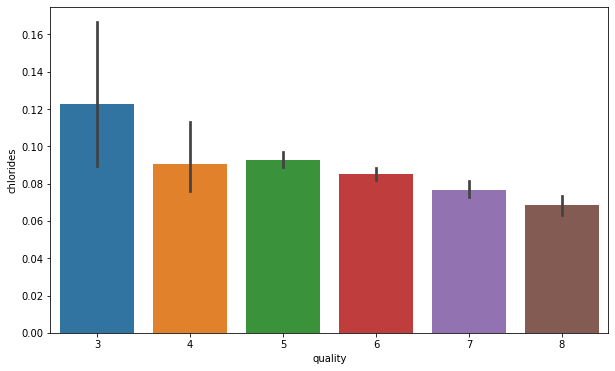

In [ ]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

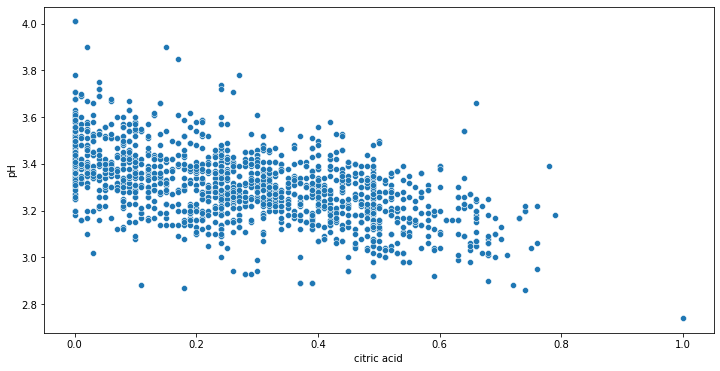

In [ ]:
# pH decreases as acid content increases
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'citric acid', y = 'pH', data = df)
plt.show()

In [ ]:
# plt.figure(figsize = (12,6))
# sns.pairplot(df)
# plt.show()

In [ ]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


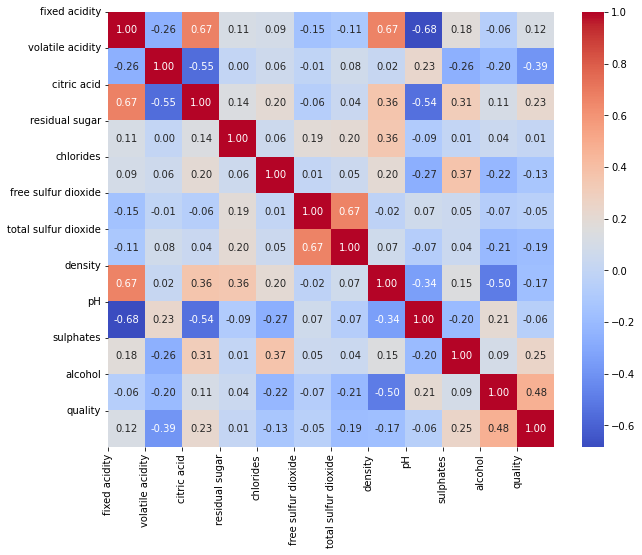

In [ ]:
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [ ]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


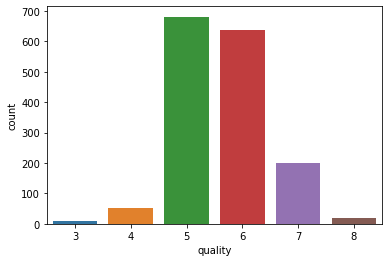

In [ ]:
sns.countplot(df["quality"])
# We see that there is classimbalance issue in the dataset.
# So we need to fix this by only taking two classes bad and good wines only.

**PRE-PROCESSING DATA FOR ML ALGORITHMS**

> 1-6 -> "bad" 7-10 -> "good"



In [ ]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (1, 6, 10)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [ ]:
#Now we assign a labels to our quality variable
label_quality = LabelEncoder()

In [ ]:
#Bad becomes 0 and good becomes 1 
df['quality'] = label_quality.fit_transform(df['quality'])

In [ ]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


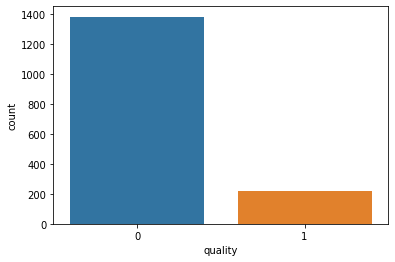

In [ ]:
sns.countplot(df['quality'])

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [ ]:
def split(X,y,train=50,validation=30,test=20,percentage=True):
  if percentage:
    train = train/100
    validation = validation/100
    test = test/100    
  from sklearn.model_selection import train_test_split
  X_temp, X_test, Y_temp, Y_test = train_test_split(X,y, test_size=test, random_state=42)
  X_train,X_valid,Y_train,Y_valid = train_test_split(X_temp,Y_temp,test_size=((validation*100)/(100 - test*100)),random_state=50)

  return X_train,X_valid,X_test,Y_train,Y_valid,Y_test

In [ ]:
X1_train,X1_valid,X1_test,Y1_train,Y1_valid,Y1_test= split(X,y)

In [ ]:
X1_train.shape

(799, 11)

**K-Fold Implementation (K=5)**

In [ ]:
# shuffel the dataset
X, y = shuffle(X, y, random_state=100)

In [ ]:
def fold(X2,Y2):
  kf = KFold(n_splits=5,random_state=1000, shuffle=True)
  kf.get_n_splits(X2)
  kfold_x_train = []
  kfold_x_test = []
  kfold_y_train = []
  kfold_y_test = []
  for train_index, test_index in kf.split(X2):
    X_train, X_test = X2[train_index], X2[test_index]
    y_train, y_test = Y2[train_index], Y2[test_index]
    kfold_x_train.append(X_train)
    kfold_x_test.append(X_test)
    kfold_y_train.append(y_train)
    kfold_y_test.append(y_test)
  kfold_x_train, kfold_x_test, kfold_y_train, kfold_y_test  = np.array(kfold_x_train), np.array(kfold_x_test), np.array(kfold_y_train), np.array(kfold_y_test)
  for i in range(0, 5):
    kfold_y_train[i] = kfold_y_train[i].flatten()
  return kfold_x_train, kfold_x_test, kfold_y_train, kfold_y_test

In [ ]:
all_x_train, all_x_test, all_y_train, all_y_test = fold(X, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


# **ML ALGORITHMS**

**1) LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [    
    {'solver' : ['lbfgs','newton-cg','liblinear', 'sag','saga'],
    'max_iter' : [100, 1000,2500, 5000],
    'tol' : [0.1, 0.01, 0.001, 0.0001, 0.00001],
    }
]
Logistic_regression =  LogisticRegression()
clf = GridSearchCV(Logistic_regression, param_grid = param_grid, n_jobs=-1)

best_clf = clf.fit(X1_train, Y1_train)

In [ ]:
LR = best_clf.best_estimator_
print(LR)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.1, verbose=0,
                   warm_start=False)


Logistic regresstion on splitted DataSet.
(TrainSet = 50%, ValidSet = 30%, testSet = 20%)




Accuracy on Training DataSet: 87.60951188986232%
Accuracy on Testing DataSet : 85.0

Confusion Matrix : 
[[257  16]
 [ 32  15]]



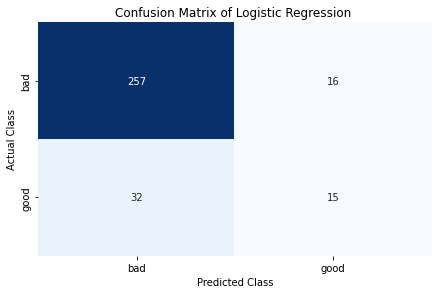

Classification Report :- 
              precision    recall  f1-score   support

           0    0.88927   0.94139   0.91459       273
           1    0.48387   0.31915   0.38462        47

    accuracy                        0.85000       320
   macro avg    0.68657   0.63027   0.64960       320
weighted avg    0.82973   0.85000   0.83675       320



In [ ]:
#Start with logistic regression model
LR_classifier = LR.fit(X1_train, Y1_train)
print("\nAccuracy on Training DataSet: " + str(LR_classifier.score(X1_train, Y1_train)*100) + "%")
predicted = LR_classifier.predict(X1_test)
print("Accuracy on Testing DataSet : " + str(accuracy_score(Y1_test, predicted)*100) + "\n")
# print(str(recall_score(Y1_test,predicted, average=None, zero_division=1)))
print('Confusion Matrix : \n' + str(confusion_matrix(Y1_test, predicted))+ "\n")

matrix_logit = confusion_matrix(Y1_test, predicted)
cm_logit = pd.DataFrame(matrix_logit, index=['bad', 'good'], columns=['bad', 'good'])

sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix of Logistic Regression "), plt.tight_layout()
plt.ylabel("Actual Class"), plt.xlabel("Predicted Class")
plt.show()

print("Classification Report :- ")
out_labels = [0, 1]
print(classification_report(Y1_test, predicted, out_labels, digits=5))

K-Fold Cross Validation using Logistic Regression.



In [ ]:
#K-Fold (K=5)
for i in range(0, 5): # for K=5
  print("For fold no:", i+1)
  print("_"*25)
  LR_classifier = LogisticRegression(tol=0.001, random_state=10, solver = 'liblinear', max_iter = 1000).fit(all_x_train[i], all_y_train[i])
  print("\nAccuracy on Training DataSet: " + str(LR_classifier.score(all_x_train[i], all_y_train[i])*100) + "%")
  predicted = LR_classifier.predict(all_x_test[i])
  print("Accuracy on Testing DataSet : " + str(accuracy_score(all_y_test[i], predicted)*100) + "\n")
  print('Confusion Matrix : \n' + str(confusion_matrix(all_y_test[i], predicted))+ "\n")
  print("Classification Report :- ")
  out_labels = [0, 1]
  print(classification_report(all_y_test[i], predicted, out_labels, digits=5))
  print("_"*25)


For fold no: 1
_________________________

Accuracy on Training DataSet: 88.11571540265832%
Accuracy on Testing DataSet : 87.5

Confusion Matrix : 
[[265  14]
 [ 26  15]]

Classification Report :- 
              precision    recall  f1-score   support

           0    0.91065   0.94982   0.92982       279
           1    0.51724   0.36585   0.42857        41

    accuracy                        0.87500       320
   macro avg    0.71395   0.65784   0.67920       320
weighted avg    0.86025   0.87500   0.86560       320

_________________________
For fold no: 2
_________________________

Accuracy on Training DataSet: 87.72478498827209%
Accuracy on Testing DataSet : 88.75

Confusion Matrix : 
[[271   8]
 [ 28  13]]

Classification Report :- 
              precision    recall  f1-score   support

           0    0.90635   0.97133   0.93772       279
           1    0.61905   0.31707   0.41935        41

    accuracy                        0.88750       320
   macro avg    0.76270   0.64420 

**2) SINGLE PERCEPTRON MODEL**

In [ ]:
from sklearn.linear_model import Perceptron


HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [    
    {
    'max_iter' : [100, 1000,2500, 5000],
    'tol' : [0.1, 0.01, 0.001, 0.0001, 0.00001],
    }
]
perceptron =  Perceptron()
clf = GridSearchCV(perceptron, param_grid = param_grid, n_jobs=-1)

best_clf = clf.fit(X1_train, Y1_train)

In [ ]:
P = best_clf.best_estimator_
print(P)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=100, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.01,
           validation_fraction=0.1, verbose=0, warm_start=False)


Perceptron on splitted DataSet.
(TrainSet = 50%, ValidSet = 30%, testSet = 20%)



Accuracy on training DataSet: 84.35544430538174%
Accuracy on Testing DataSet : 80.625

Confusion Matrix : 
[[244  29]
 [ 33  14]]



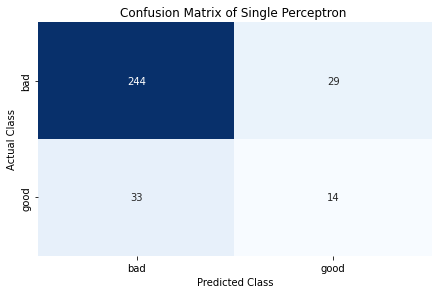

Classification Report :- 
              precision    recall  f1-score   support

           0    0.88087   0.89377   0.88727       273
           1    0.32558   0.29787   0.31111        47

    accuracy                        0.80625       320
   macro avg    0.60322   0.59582   0.59919       320
weighted avg    0.79931   0.80625   0.80265       320



In [ ]:
P_classifier = P.fit(X1_train, Y1_train)
print("Accuracy on training DataSet: " + str(P_classifier.score(X1_train, Y1_train)*100) + "%")
predicted = P_classifier.predict(X1_test)
print("Accuracy on Testing DataSet : " + str(accuracy_score(Y1_test, predicted)*100) + "\n")
print('Confusion Matrix : \n' + str(confusion_matrix(Y1_test, predicted))+ "\n")

matrix_logit = confusion_matrix(Y1_test, predicted)
cm_logit = pd.DataFrame(matrix_logit, index=['bad', 'good'], columns=['bad', 'good'])

sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix of Single Perceptron "), plt.tight_layout()
plt.ylabel("Actual Class"), plt.xlabel("Predicted Class")
plt.show()

print("Classification Report :- ")
out_labels = [0, 1]
print(classification_report(Y1_test, predicted, out_labels, digits=5))

K-Fold Cross Validation using Perceptron Model.

In [ ]:
#Perceptron Model
for i in range(0, 5): # for 5 fold
  print("For fold no:", i+1)
  print("_"*25)
  P_classifier = Perceptron( tol=1e-3, random_state=10, max_iter=100).fit(all_x_train[i], all_y_train[i])
  print("Accuracy on Training DataSet: " + str(P_classifier.score(all_x_train[i], all_y_train[i])*100) + "%")
  predicted = P_classifier.predict(all_x_test[i])
  print("Accuracy on Testing DataSet : " + str(accuracy_score(all_y_test[i], predicted)*100) + "\n")
  print('Confusion Matrix : \n' + str(confusion_matrix(all_y_test[i], predicted))+ "\n")
  print("Classification Report :- ")
  out_labels = [0, 1]
  print(classification_report(all_y_test[i], predicted, out_labels, digits=5))
  print("_"*25)


For fold no: 1
_________________________
Accuracy on Training DataSet: 83.58092259577795%
Accuracy on Testing DataSet : 80.9375

Confusion Matrix : 
[[233  46]
 [ 15  26]]

Classification Report :- 
              precision    recall  f1-score   support

           0    0.93952   0.83513   0.88425       279
           1    0.36111   0.63415   0.46018        41

    accuracy                        0.80937       320
   macro avg    0.65031   0.73464   0.67221       320
weighted avg    0.86541   0.80937   0.82992       320

_________________________
For fold no: 2
_________________________
Accuracy on Training DataSet: 78.4206411258796%
Accuracy on Testing DataSet : 77.1875

Confusion Matrix : 
[[232  47]
 [ 26  15]]

Classification Report :- 
              precision    recall  f1-score   support

           0    0.89922   0.83154   0.86406       279
           1    0.24194   0.36585   0.29126        41

    accuracy                        0.77187       320
   macro avg    0.57058   0.5987

**3) MULTI LAYER PERCEPTRON (MLP)**

In [ ]:
from sklearn.neural_network import MLPClassifier

HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [    
    {'activation' : ['identity', 'logistic', 'tanh', 'relu'],
     'solver' : ['lbfgs', 'sgd', 'adam'],
     'max_iter' : [100, 1000,2500, 5000],
    'tol' : [0.1, 0.01, 0.001, 0.0001, 0.00001],
    }
]
mlp =  MLPClassifier()
#  cv=2 because we are not using kFold validation here, so to divide folds into test and train we are using cv=2
clf = GridSearchCV(mlp, param_grid = param_grid, n_jobs=-1)

best_clf = clf.fit(X1_train, Y1_train)

In [ ]:
MLP = best_clf.best_estimator_
print(MLP)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
              tol=0.01, validation_fraction=0.1, verbose=False,
              warm_start=False)


MLP on splitted DataSet.
(TrainSet = 50%, ValidSet = 30%, testSet = 20%)



Accuracy on Training DataSet: 88.11013767209012%
Accuracy on  Testing DataSet: 85.9375

Confusion Matrix : 
[[262  11]
 [ 34  13]]



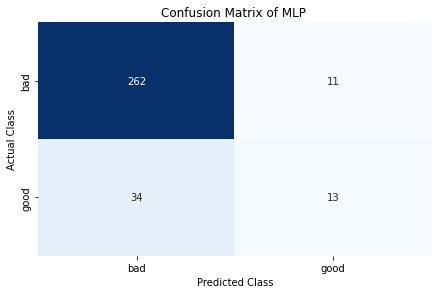

Classification Report :-
              precision    recall  f1-score   support

           0    0.88514   0.95971   0.92091       273
           1    0.54167   0.27660   0.36620        47

    accuracy                        0.85938       320
   macro avg    0.71340   0.61815   0.64356       320
weighted avg    0.83469   0.85938   0.83944       320



In [ ]:
mlp = MLP.fit(X1_train, Y1_train)
mlp.predict(all_x_train[i])
print("Accuracy on Training DataSet: " + str(mlp.score(X1_train, Y1_train)*100) + "%")
predicted = mlp.predict(X1_test)
print("Accuracy on  Testing DataSet: " + str(accuracy_score(Y1_test, predicted)*100) + "\n")
print('Confusion Matrix : \n' + str(confusion_matrix(Y1_test, predicted)) + "\n")

matrix_logit = confusion_matrix(Y1_test, predicted)
cm_logit = pd.DataFrame(matrix_logit, index=['bad', 'good'], columns=['bad', 'good'])

sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix of MLP "), plt.tight_layout()
plt.ylabel("Actual Class"), plt.xlabel("Predicted Class")
plt.show()

print("Classification Report :-")
out_labels = [0, 1]
print(classification_report(Y1_test, predicted, out_labels, digits=5))


K-Fold Cross Validation Using MultiLayer Perceptron.

In [ ]:
for i in range(0, 5): # for 5 fold
  print("For fold no:", i+1)
  print("_"*25)
  mlp = MLPClassifier( activation='logistic', random_state=1, max_iter=2000).fit(all_x_train[i], all_y_train[i])
  mlp.predict(all_x_train[i])
  print("Accuracy on Training DataSet: " + str(mlp.score(all_x_train[i], all_y_train[i])*100) + "%")
  predicted = mlp.predict(all_x_test[i])
  print("Accuracy on  Testing DataSet: " + str(accuracy_score(all_y_test[i], predicted)*100) + "\n")
  print('Confusion Matrix : \n' + str(confusion_matrix(all_y_test[i], predicted)) + "\n")
  print("Classification Report :-")
  out_labels = [0, 1]
  print(classification_report(all_y_test[i], predicted, out_labels, digits=5))

  print("_"*25)

For fold no: 1
_________________________
Accuracy on Training DataSet: 87.95934323690383%
Accuracy on  Testing DataSet: 87.5

Confusion Matrix : 
[[264  15]
 [ 25  16]]

Classification Report :-
              precision    recall  f1-score   support

           0    0.91349   0.94624   0.92958       279
           1    0.51613   0.39024   0.44444        41

    accuracy                        0.87500       320
   macro avg    0.71481   0.66824   0.68701       320
weighted avg    0.86258   0.87500   0.86742       320

_________________________
For fold no: 2
_________________________
Accuracy on Training DataSet: 87.95934323690383%
Accuracy on  Testing DataSet: 89.0625

Confusion Matrix : 
[[271   8]
 [ 27  14]]

Classification Report :-
              precision    recall  f1-score   support

           0    0.90940   0.97133   0.93934       279
           1    0.63636   0.34146   0.44444        41

    accuracy                        0.89062       320
   macro avg    0.77288   0.65639   

___________________________________________
# **Result**
___________________________________________

Among all the 3 models :
Logistic regression, Single Preceptron, MLP

MLP has best accuracy.